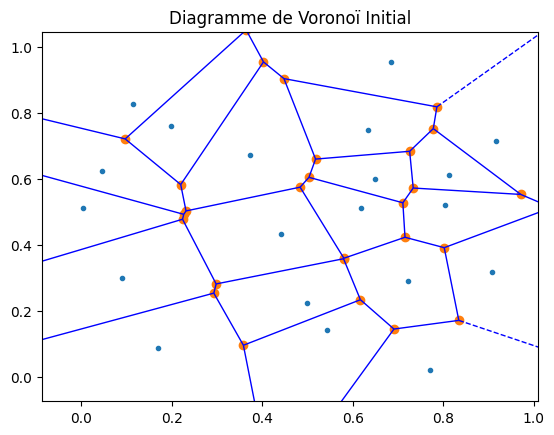

In [106]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
np.random.seed(10)
points = np.random.rand(20, 2)  # 10 sites initiaux
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
ax.set_title('Diagramme de Voronoï Initial')
plt.show()


In [107]:
print(voronoi_initial.ridge_vertices)


[[-1, 0], [-1, 4], [0, 1], [1, 3], [3, 4], [-1, 6], [-1, 5], [5, 7], [6, 7], [8, 9], [8, 10], [9, 11], [10, 11], [-1, 8], [0, 10], [1, 2], [2, 11], [2, 13], [9, 15], [13, 14], [14, 16], [15, 16], [-1, 17], [15, 17], [18, 19], [18, 21], [19, 20], [20, 22], [21, 22], [3, 21], [12, 13], [12, 18], [6, 20], [7, 19], [4, 22], [12, 26], [14, 23], [23, 26], [5, 25], [-1, 24], [24, 25], [25, 26], [27, 28], [27, 29], [28, 30], [29, 30], [23, 28], [24, 27], [17, 29], [16, 30]]


In [108]:
#SDF
def point_in_circle(x, y, h, k, r):
    # Calculate the value of the circle's equation at point (x, y)
    return (x - h)**2 + (y - k)**2 - r**2


In [109]:
def perpendicular_bisector(A, B, length=10):
    """
    Calculate the points of the perpendicular bisector of the line segment AB.
    
    Parameters:
    A (tuple): Coordinates of point A (x1, y1)
    B (tuple): Coordinates of point B (x2, y2)
    length (float): Length to extend the bisector line on each side of the midpoint.
    
    Returns:
    tuple: Arrays of x and y coordinates of the perpendicular bisector line.
    """
    # Calculate the midpoint of A and B
    midpoint = ((A[0] + B[0]) / 2, (A[1] + B[1]) / 2)

    # Calculate the slope of the line AB and its perpendicular slope
    if A[0] == B[0]:  # AB is a vertical line
        x_vals = np.array([midpoint[0] - length, midpoint[0] + length])
        y_vals = np.array([midpoint[1], midpoint[1]])
    elif A[1] == B[1]:  # AB is a horizontal line
        
        x_vals = np.array([midpoint[0], midpoint[0]])
        y_vals = np.array([midpoint[1] - length, midpoint[1] + length])
    else:
        slope_AB = (B[1] - A[1]) / (B[0] - A[0])
        perpendicular_slope = -1 / slope_AB

        # Generate points for the perpendicular bisector line
        x_vals = np.linspace(midpoint[0] - length, midpoint[0] + length, 400)
        y_vals = perpendicular_slope * (x_vals - midpoint[0]) + midpoint[1]

    return x_vals, y_vals

In [119]:
def move_points_to_circle_edge(A, B, h, k, r):
    """
    Move points A and B so that their perpendicular bisector intersects the circle at its edge.
    
    Parameters:
    A (tuple): Coordinates of point A (x1, y1)
    B (tuple): Coordinates of point B (x2, y2)
    h (float): x-coordinate of the circle's center
    k (float): y-coordinate of the circle's center
    r (float): Radius of the circle
    
    Returns:
    tuple: New coordinates of points A and B
    """
    # Calculate the midpoint of A and B
    midpoint = ((A[0] + B[0]) / 2, (A[1] + B[1]) / 2)
    
    # Calculate the direction vector from the center to the midpoint
    direction = np.array([midpoint[0] - h, midpoint[1] - k])
    direction = direction / np.linalg.norm(direction)  # Normalize the direction vector
    
    # Calculate the new midpoint on the circle's edge
    new_midpoint = (np.array([h, k]) + r) * direction
    
    # Calculate the displacement needed to move the midpoint to the circle's edge
    displacement = new_midpoint - midpoint
    
    # Move points A and B by the displacement
    new_A = np.array(A) + displacement
    new_B = np.array(B) + displacement
    
    return new_A, new_B

In [120]:
def plot_graph(x,y,h,r,A,B,filename):
    x_bisector, y_bisector = perpendicular_bisector(A, B)
    # Move points A and B
    new_A, new_B = move_points_to_circle_edge(A, B, h, k, r)
    new_x_bisector, new_y_bisector = perpendicular_bisector(new_A, new_B)
    # Create the plot
    plt.figure(figsize=(6,6))
    plt.plot(x, y)
    plt.xlim(h - r - 5, h + r + 5)
    plt.ylim(k - r - 5, k + r + 5)
    
    plt.title('Circle with center at ({}, {}) and radius {}'.format(h, k, r))
    
    plt.plot([A[0], B[0], new_B[0], new_A[0]], [A[1], B[1], new_B[1], new_A[1]], 'ro')  # Sites A et B
    plt.plot([A[0], B[0]], [A[1], B[1]], 'r-', label='Line segment AB')
    plt.plot([new_A[0], new_B[0]], [new_A[1], new_B[1]], 'b-', label='Moved Line segment AB')
    
    # Mark points A, B, new_A, and new_B
    plt.scatter([A[0], B[0], new_A[0], new_B[0]], [A[1], B[1], new_A[1], new_B[1]], color='red')
    plt.text(A[0], A[1], ' A', fontsize=12, verticalalignment='bottom')
    plt.text(B[0], B[1], ' B', fontsize=12, verticalalignment='bottom')
    plt.text(new_A[0], new_A[1], ' new_A', fontsize=12, verticalalignment='bottom')
    plt.text(new_B[0], new_B[1], ' new_B', fontsize=12, verticalalignment='bottom')
    
    
    plt.plot(x_bisector, y_bisector, 'g--', label='Perpendicular bisector')
    plt.plot(new_x_bisector, new_y_bisector, 'g--', label='Perpendicular bisector')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

-25.0
4.09


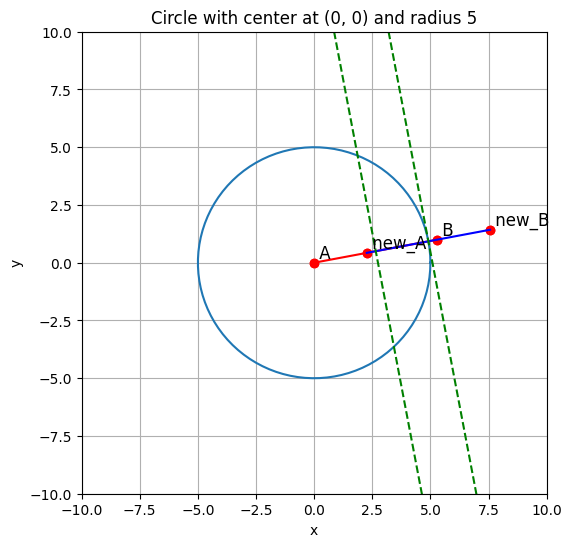

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Coordonnées des vertices
A = np.array([0.0, 0.0])
B = np.array([5.3, 1.0])
filename = ''
# Define the center and radius
h, k = 0, 0  # Center of the circle
r = 5        # Radius of the circle


# Create an array of angles from 0 to 2*pi
theta = np.linspace(0, 2 * np.pi, 100)

# Parametric equations for the circle
x = h + r * np.cos(theta)
y = k + r * np.sin(theta)

print(point_in_circle(A[0],A[1],h,k,r))
print(point_in_circle(B[0],B[1],h,k,r))

plot_graph(x,y,h,r,A,B,filename)

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate random points
def generate_random_points(num_points, low, high):
    return np.random.uniform(low, high, size=(num_points, 2))

# Number of random points
num_points = 10

# Range for the random points
low = -6
high = 6

# Generate random points
LA = generate_random_points(num_points, low, high)
LB = generate_random_points(num_points, low, high)

# Display the points
print("List of random points A and B:")
for i, point in enumerate(LA, start=1):
    print(f"Point A {i}: {point}")
for i, point in enumerate(LB, start=1):
    print(f"Point B {i}: {point}")



List of random points A and B:
Point A 1: [-3.37476781  3.02995404]
Point A 2: [-4.71744499  2.93523889]
Point A 3: [-0.36257648  1.17906806]
Point A 4: [-4.22855769 -3.79158213]
Point A 5: [ 1.74086552 -5.41646392]
Point A 6: [-3.01664991  0.50890219]
Point A 7: [-3.27871988 -1.42306158]
Point A 8: [5.06679344 5.10428247]
Point A 9: [0.80099909 0.40165062]
Point A 10: [-5.8216797   5.73479116]
Point B 1: [0.87634685 3.50108396]
Point B 2: [0.73868832 4.5280229 ]
Point B 3: [1.01034994 2.50619792]
Point B 4: [-4.21759858 -0.85859113]
Point B 5: [ 2.3266808  -4.74456307]
Point B 6: [-0.72473715 -4.00557423]
Point B 7: [0.08374355 3.82843037]
Point B 8: [-4.91871918  3.60082501]
Point B 9: [0.78151625 1.07217254]
Point B 10: [-3.62279211 -0.76658094]


-4.430320729221322
-11.974427339106947


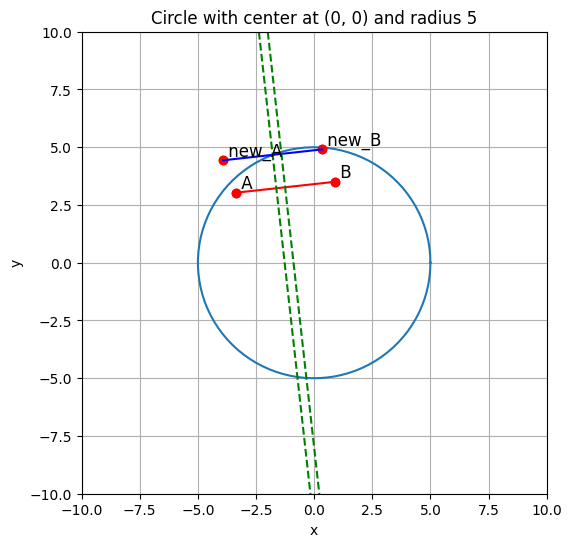

5.8699145452850985
-3.951348189127028


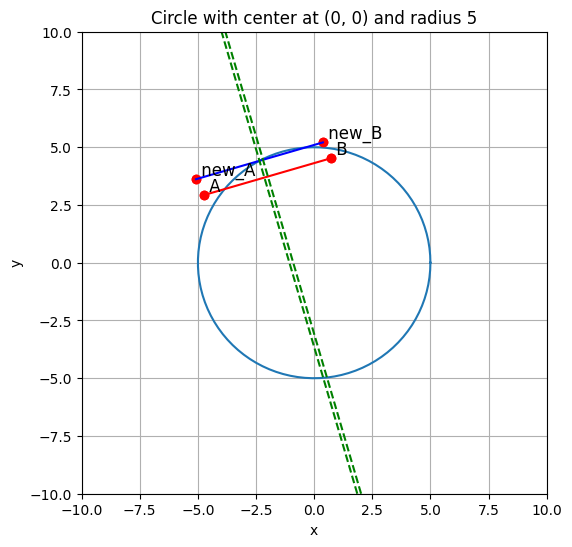

-23.478336817938104
-17.69816499765141


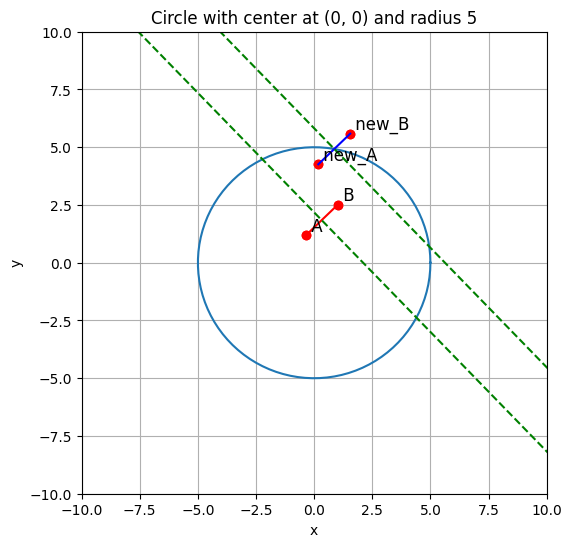

7.256795245005037
-6.474683453971416


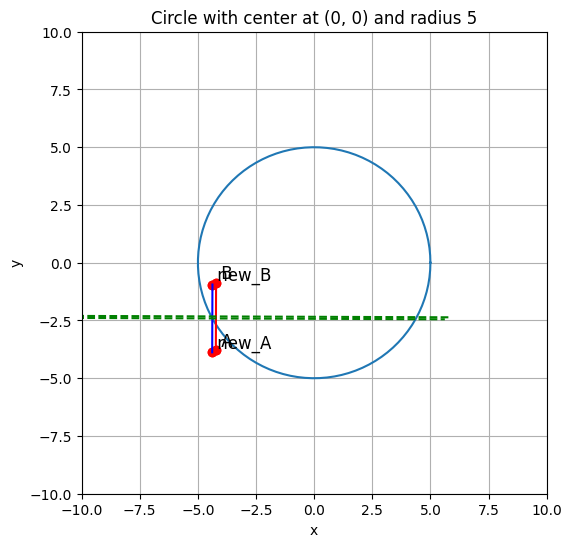

7.368694199518281
2.924322211631175


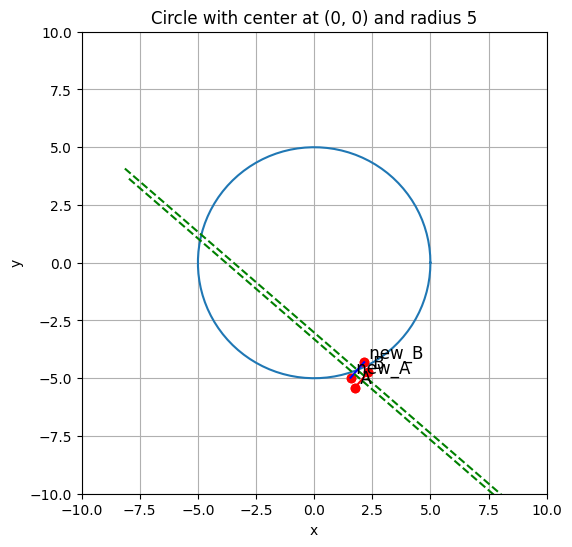

-15.640841898610208
-8.43013117580852


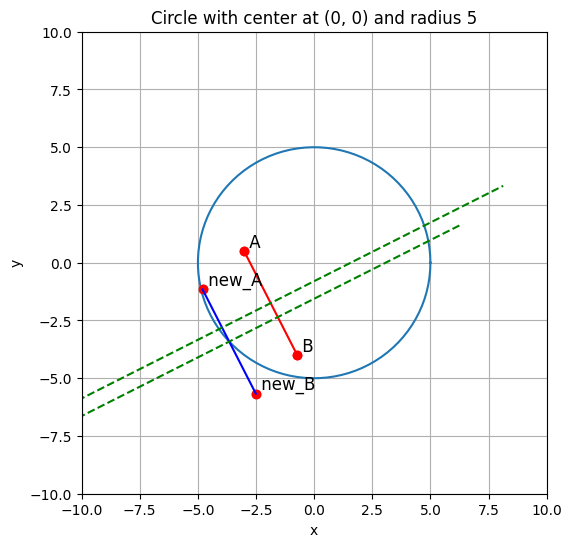

-12.224891679780614
-10.336107922497543


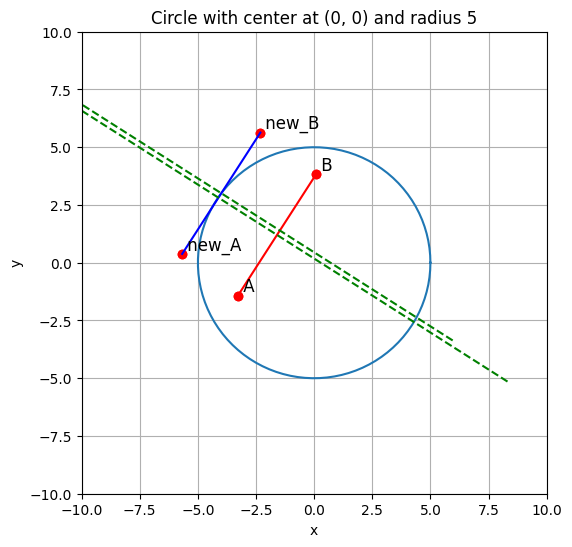

26.726095371035292
12.159739144842597


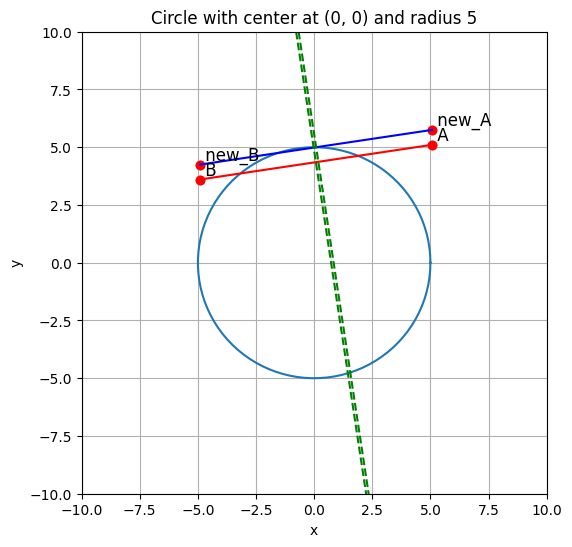

-24.197077229529008
-23.23967839901466


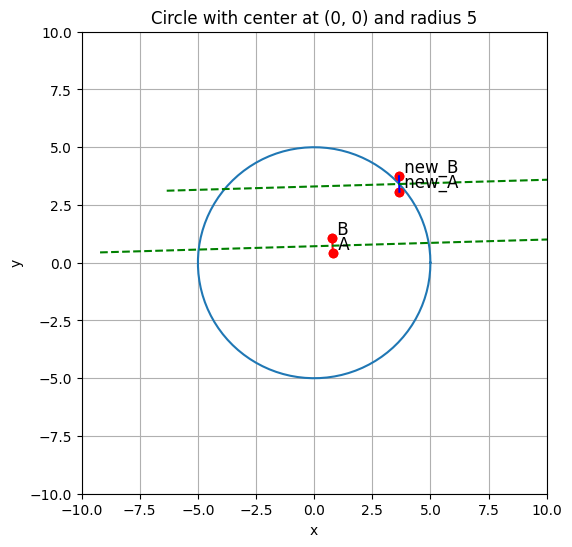

41.77978423890333
-11.287730971714748


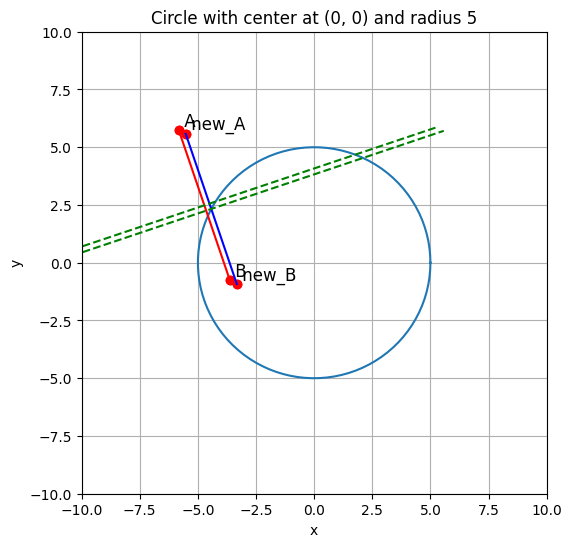

In [123]:

for i in range(num_points):    
    # Coordonnées des vertices
    A = LA[i]
    B = LB[i]
    filename = "plot"+f'{i}'+".png"

    # Define the center and radius
    h, k = 0, 0  # Center of the circle
    r = 5        # Radius of the circle
    
    
    # Create an array of angles from 0 to 2*pi
    theta = np.linspace(0, 2 * np.pi, 100)
    
    # Parametric equations for the circle
    x = h + r * np.cos(theta)
    y = k + r * np.sin(theta)
    
    print(point_in_circle(A[0],A[1],h,k,r))
    print(point_in_circle(B[0],B[1],h,k,r))
    
    plot_graph(x,y,h,r,A,B,filename)
    

B-A = droite, trouver p_milieu, droite mediatrice normale

si changement de signe SDF entre A et B: 
	point intersection sdf et AB - point mediatrice AB  = longeur et direction du déplacement


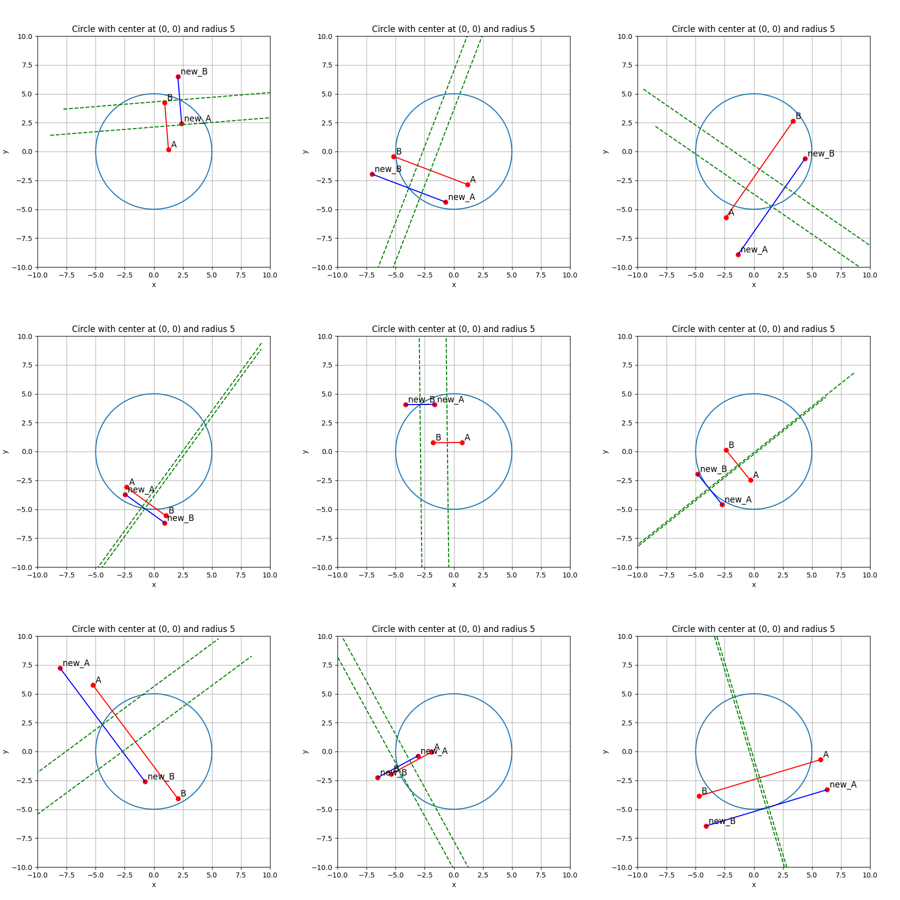

In [118]:
from PIL import Image

# Load images
images = [
    Image.open('images/plot0.png'),
    Image.open('images/plot1.png'),
    Image.open('images/plot2.png'),
    Image.open('images/plot3.png'),
    Image.open('images/plot4.png'),
    Image.open('images/plot5.png'),
    Image.open('images/plot6.png'),
    Image.open('images/plot7.png'),
    Image.open('images/plot8.png'),
    Image.open('images/plot9.png')
    # Add the remaining 5 images here
]

# Optional: resize images to a uniform size (if they are not already)
# Example: resize all images to 300x300 pixels
images = [img.resize((300, 300)) for img in images]

# Create a blank canvas for the 3x3 mosaic
mosaic_width = 900  # 3 images * 300 pixels each
mosaic_height = 900  # 3 images * 300 pixels each
mosaic = Image.new('RGB', (mosaic_width, mosaic_height))

# Paste images into the mosaic
for i, img in enumerate(images):
    row = i // 3
    col = i % 3
    mosaic.paste(img, (col * 300, row * 300))

# Save the resulting mosaic
mosaic.save('mosaic.png')

# Display the resulting mosaic
mosaic.show()
